<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project--Trading-Evaluation-Notebook" data-toc-modified-id="Capstone-Project--Trading-Evaluation-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Project- Trading Evaluation Notebook</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Import-pickles" data-toc-modified-id="Import-pickles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import pickles</a></span></li></ul></li><li><span><a href="#Trading-Evaluation" data-toc-modified-id="Trading-Evaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trading Evaluation</a></span><ul class="toc-item"><li><span><a href="#100%-Leverage" data-toc-modified-id="100%-Leverage-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>100% Leverage</a></span></li></ul></li></ul></div>

# Capstone Project- Trading Evaluation Notebook
Cary Mosley, 2020

## Import Libraries

In [1]:
import pandas as pd
import calendar, time
import datetime as dt
from datetime import date
from pandas.tseries.offsets import DateOffset
import numpy as np
import string, re 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR

import pickle
from sklearn.externals import joblib

%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

/Users/carymosley/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Import pickles

In [5]:
#Loading pickled dataframes
#Multivariate dataframe with SPY and VIX closing values
var_df = pd.read_pickle('../ModelPickles/var_df')
#Multivariate dataframe with SPY differenced and VIX closing values
var_vix = pd.read_pickle('../ModelPickles/var_vix')
#Multivariate dataframe with SPY differenced and VIX differenced values
var_diff = pd.read_pickle('../ModelPickles/var_diff')
#Univariate dataframe with SPY differenced values
spy_diff = pd.read_pickle('../ModelPickles/spy_diff')
#Univariate dataframe with VIX differenced values
vix_diff = pd.read_pickle('../ModelPickles/vix_diff')
#Univariate dataframe with VIX closing values
vix_df = pd.read_pickle('../ModelPickles/vix_df')
#Univariate dataframe with SPY closing values
spy_df = pd.read_pickle('../ModelPickles/spy_df')
#Final exogenous variables to align with differenced data
exog_diff = pd.read_pickle('../ModelPickles/exog_diff')
#Final exogenous variables
exog = pd.read_pickle('../ModelPickles/exog')

Lets look at the dataframes to refresh memory of what is contained

In [6]:
var_df

,Adj Close,Adj Close
Date,,
2006-06-29,96.124527,13.080000
2006-07-06,96.086758,13.705000
2006-07-13,94.830073,15.498000
2006-07-20,93.916246,17.108000
2006-07-27,95.820935,14.744000
...,...,...
2020-04-02,253.113998,53.078001
2020-04-09,270.555000,44.240000
2020-04-16,280.590009,39.606000


In [7]:
var_vix

,SPY Differenced,Adj Close
Date,,
2006-07-06,-0.037769,13.705000
2006-07-13,-1.256684,15.498000
2006-07-20,-0.913828,17.108000
2006-07-27,1.904689,14.744000
2006-08-03,0.812601,14.628000
...,...,...
2020-04-02,7.612000,53.078001
2020-04-09,17.441002,44.240000
2020-04-16,10.035009,39.606000


In [8]:
var_diff

,SPY Differenced,VIX Differenced
Date,,
2006-07-06,-0.037769,0.625000
2006-07-13,-1.256684,1.793000
2006-07-20,-0.913828,1.610000
2006-07-27,1.904689,-2.364000
2006-08-03,0.812601,-0.116000
...,...,...
2020-04-02,7.612000,-9.671999
2020-04-09,17.441002,-8.838001
2020-04-16,10.035009,-4.634000


In [9]:
spy_df

,Adj Close
Date,
2006-06-29,96.124527
2006-07-06,96.086758
2006-07-13,94.830073
2006-07-20,93.916246
2006-07-27,95.820935
...,...
2020-04-02,253.113998
2020-04-09,270.555000
2020-04-16,280.590009


In [10]:
vix_df

,Adj Close
Date,
2006-06-29,13.080000
2006-07-06,13.705000
2006-07-13,15.498000
2006-07-20,17.108000
2006-07-27,14.744000
...,...
2020-04-02,53.078001
2020-04-09,44.240000
2020-04-16,39.606000


In [11]:
spy_diff

,SPY Differenced,Lag
Date,,
2006-07-06,-0.037769,NaN
2006-07-13,-1.256684,-0.037769
2006-07-20,-0.913828,-1.256684
2006-07-27,1.904689,-0.913828
2006-08-03,0.812601,1.904689
...,...,...
2020-04-02,7.612000,6.247799
2020-04-09,17.441002,7.612000
2020-04-16,10.035009,17.441002


In [12]:
spy_diff.drop(columns=['Lag'],inplace=True)

In [13]:
vix_diff

,VIX Differenced
Date,
2006-07-06,0.625000
2006-07-13,1.793000
2006-07-20,1.610000
2006-07-27,-2.364000
2006-08-03,-0.116000
...,...
2020-04-02,-9.671999
2020-04-09,-8.838001
2020-04-16,-4.634000


In [14]:
exog

,Snippet_VADER,Median,Med_and_Spread,Med_and_VADER
Date,,,,
2006-06-29,0.057591,65.0,-0.760500,3.743401
2006-07-06,0.089420,20.0,-0.984000,1.788394
2006-07-13,0.119572,25.0,-0.730000,2.989307
2006-07-20,0.168046,25.0,-8.487500,4.201147
2006-07-27,0.108139,15.0,-1.221000,1.622079
...,...,...,...,...
2020-04-02,-0.031870,20.5,-3.175286,-0.653335
2020-04-09,0.071296,25.0,-2.017300,1.782407
2020-04-16,-0.057846,35.0,-2.760800,-2.024604


In [15]:
exog_diff

,Snippet_VADER,Median,Med_and_Spread,Med_and_VADER
Date,,,,
2006-07-06,0.057591,65.0,-0.760500,3.743401
2006-07-13,0.089420,20.0,-0.984000,1.788394
2006-07-20,0.119572,25.0,-0.730000,2.989307
2006-07-27,0.168046,25.0,-8.487500,4.201147
2006-08-03,0.108139,15.0,-1.221000,1.622079
...,...,...,...,...
2020-04-02,-0.002491,15.0,-2.875635,-0.037370
2020-04-09,-0.031870,20.5,-3.175286,-0.653335
2020-04-16,0.071296,25.0,-2.017300,1.782407


In [16]:
spy_arima = joblib.load('spy_model.pkl') 
vix_arima = joblib.load('vix_model.pkl') 
var_model = joblib.load('var_model.pkl') 
varmax_model = joblib.load('varmax_model.pkl') 

In [17]:
train_end = '2018-04'
test_start = '2018-05'
exog_diff_train = exog_diff[:train_end]
exog_diff_test = exog_diff[test_start:]
exog_train = exog[:train_end]
exog_test = exog[test_start:]

spy_diff_train = spy_diff[:train_end]
spy_diff_test = spy_diff[test_start:]
spy_train = pd.DataFrame(spy_df['Adj Close'][:train_end])
spy_test = pd.DataFrame(spy_df['Adj Close'][test_start:])

vix_diff_train = vix_diff[:train_end]
vix_diff_test = vix_diff[test_start:]
vix_train = pd.DataFrame(vix_df['Adj Close'][:train_end])
vix_test = pd.DataFrame(vix_df['Adj Close'][test_start:])

var_train = var_vix[:train_end]
var_test = var_vix[test_start:]
exog_train_var = exog_diff[:train_end]
exog_test_var = exog_diff[test_start:]

# Trading Evaluation

In this section I'll test various trading strategies to see how my models perform compared to a baseline.

## 100% Leverage

The first model I'll explore is one in which we go long 100% worth of the portfolio if the expected change is positive or short 100% if the predicted change is negative. The PnL is based on the next periods price compared to the current periods. For the baseline it will buy if the previous period was positive and sell if it was negative.
I'll set my model based on the parameters specified and move forward one period each time, with a fit based on the actual values at each time.

In [154]:
#This cell creates one step forward forecasts for the SPY ARIMAX model and updates the model using the new set of data

spy_diff_train_trade = spy_diff_train
exog_diff_train_trade = exog_diff_train
spy_forecasts = []
order = (1,0,1)
for i in range(0,len(spy_test)):
    #make a forecast and then append the actual value and retrain the model
    spy_forecasts.append(spy_arima.forecast(1,exog_diff_test.iloc[i])[0][0])
    spy_diff_train_trade= spy_diff_train_trade.append(pd.DataFrame(spy_diff_test[:i]))
    exog_diff_train_trade = exog_diff_train_trade.append(pd.DataFrame(exog_diff_test[:i]))
    spy_arima = ARIMA(endog = spy_diff_train_trade, exog=exog_diff_train_trade, order=order).fit()
    

    
        

In [171]:
#This cell creates one step forward forecasts for the VIX ARIMAX model and updates the model using the new set of data


vix_train_trade = vix_train
exog_train_trade = exog_train.drop(columns = ['Med_and_Spread','Med_and_VADER'])
exog_test_trade = exog_test.drop(columns = ['Med_and_Spread','Med_and_VADER'])
vix_forecasts = []
order = (1,0,1)
for i in range(0,len(vix_test)):
    #make a forecast and then append the actual value and retrain the model
    vix_forecasts.append(vix_arima.forecast(1,exog_test_trade.iloc[i])[0][0])
    vix_train_trade= vix_train_trade.append(pd.DataFrame(vix_test[:i]))
    exog_train_trade = exog_train_trade.append(pd.DataFrame(exog_test_trade[:i]))
    vix_arima = ARIMA(endog = vix_train_trade, exog=exog_train_trade, order=order).fit()

In [254]:
#This cell creates one step forward forecasts for the multivariate VAR model and updates the model using the new set of data


var_train_trade = var_train
exog_train_trade = exog_train_var
var_forecasts = []

for i in range(0,len(vix_test)):
    #make a forecast and then append the actual value and retrain the model
    var_forecasts.append(var_model.forecast(y=var_model.y,steps=1,exog_future = pd.DataFrame(exog_test_var.iloc[i]).T)[0])
    var_train_trade= var_train_trade.append(pd.DataFrame(var_test[:i]))
    exog_train_trade = exog_train_trade.append(pd.DataFrame(exog_test_var[:i]))
    var_model = VAR(endog = var_train_trade, exog=exog_train_trade).fit(1)
    
    

In [255]:
#This cell splits the VAR forecasts into two lists, one for SPY and one for VIX
spy_var_forecasts=[]
vix_var_forecasts=[]
for i in range(0,len(var_forecasts)):
    spy_var_forecasts.append(var_forecasts[i][0])
    vix_var_forecasts.append(var_forecasts[i][1])

In [261]:
#This cell creates one step forward forecasts for the multivariate VARMAX model and updates the model using the new set of data

varmax_train_trade = var_train
exog_train_trade = exog_train_var
varmax_forecasts = []
order = (1,2)

for i in range(0,len(vix_test)):
    #make a forecast and then append the actual value and retrain the model
    varmax_forecasts.append(varmax_model.forecast(steps=1,exog = pd.DataFrame(exog_test_var.iloc[i]).T))
    varmax_train_trade= varmax_train_trade.append(pd.DataFrame(var_test[:i]))
    exog_train_trade = exog_train_trade.append(pd.DataFrame(exog_test_var[:i]))
    varmax_model = sm.tsa.VARMAX(endog = varmax_train_trade,order=order, exog=exog_train_trade).fit(maxiter=100)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [280]:
spy_varmax_forecasts=[]
vix_varmax_forecasts=[]
for i in range(0,len(varmax_forecasts)):
    spy_varmax_forecasts.append(varmax_forecasts[i].iloc[0][0])
    vix_varmax_forecasts.append(varmax_forecasts[i].iloc[0][1])

In [285]:
#pickle the forecasts
joblib.dump(spy_forecasts,'spy_forecasts.pkl')
joblib.dump(spy_var_forecasts,'spy_var_forecasts.pkl')
joblib.dump(spy_varmax_forecasts,'spy_varmax_forecasts.pkl')
joblib.dump(vix_forecasts,'vix_forecasts.pkl')
joblib.dump(vix_var_forecasts,'vix_var_forecasts.pkl')
joblib.dump(vix_varmax_forecasts,'vix_varmax_forecasts.pkl')


['vix_varmax_forecasts.pkl']

In [2]:
#load pickles
spy_forecasts = joblib.load('spy_forecasts.pkl')
spy_var_forecasts = joblib.load('spy_var_forecasts.pkl')
spy_varmax_forecasts = joblib.load('spy_varmax_forecasts.pkl')
vix_forecasts = joblib.load('vix_forecasts.pkl')
vix_var_forecasts = joblib.load('vix_var_forecasts.pkl')
vix_varmax_forecasts = joblib.load('vix_varmax_forecasts.pkl')

In [57]:
#converting the spy and vix test prices to a list of values
spy_eval = []
vix_eval = []
for i in range(0,len(spy_test)):
    spy_eval.append(spy_test.values[i].item())
    vix_eval.append(vix_test.values[i].item())


105

In [105]:
#converting the vix forecasts into expected changes
first_spy = spy_train.iloc[-1].item()
first_vix = vix_train.iloc[-1].item()
vix_forecasts_chg = []
vix_var_forecasts_chg = []
vix_varmax_forecasts_chg = []
for i in range(0,len(vix_forecasts)):
    if i == 0: 
        vix_forecasts_chg.append(vix_forecasts[0] - first_vix)
        vix_var_forecasts_chg.append(vix_forecasts[0] - first_vix)
        vix_varmax_forecasts_chg.append(vix_forecasts[0] - first_vix)
    else:
        vix_forecasts_chg.append(vix_forecasts[i]-vix_eval[i-1])
        vix_var_forecasts_chg.append(vix_var_forecasts[i] - vix_eval[i-1])
        vix_varmax_forecasts_chg.append(vix_varmax_forecasts[i] - vix_eval[i-1])


In [138]:


#Set initial equity to $100,000
spy_arimax_equity = 100000
vix_arimax_equity = 100000
spy_var_equity = 100000
vix_var_equity = 100000
spy_varmax_equity = 100000
vix_varmax_equity = 100000
hold_spy = 100000


spy_equity_df = pd.DataFrame(columns=['Buy and Hold', 'SPY-ARIMAX', 'SPY-VAR', 'SPY-VARMAX'])

vix_equity_df = pd.DataFrame(columns=['VIX-ARIMAX','VIX-VAR','VIX-VARMAX'])

#This calculates the performance of SPY based on the various models
for date in range(0,len(spy_forecasts)):
    
    
    #use the previous closing price to calculate the one period % change in SPY and VIX
    if date == 0:
        spy_change_pos = 1 + (spy_eval[0]-first_spy)/first_spy
        vix_change_pos = 1 + (spy_eval[0]-first_vix)/first_vix
        spy_change_neg = 1 + (first_spy - spy_eval[0])/first_spy
        vix_change_neg = 1 + (first_vix - vix_eval[0])/first_vix
        hold_spy = 100000 * (1+(spy_eval[0]-first_spy)/first_spy)
    else:
        spy_change_pos = 1 + (spy_eval[date] - spy_eval[date-1])/spy_eval[date-1]
        vix_change_pos = 1 + (vix_eval[date] - vix_eval[date-1])/vix_eval[date-1]
        spy_change_neg = 1 + (spy_eval[date-1] - spy_eval[date])/spy_eval[date-1]
        vix_change_neg = 1 + (vix_eval[date-1] - vix_eval[date])/vix_eval[date-1]
        hold_spy = 100000 * (1+(spy_eval[date]-spy_eval[0])/spy_eval[0])
    #Calculate the total equity for each spy forecast model
    if spy_forecasts[date] > 0:
        
        spy_arimax_equity = spy_arimax_equity * spy_change_pos  
    else:
        
        spy_arimax_equity = spy_arimax_equity  * spy_change_neg
            
    if spy_var_forecasts[date] > 0:
        
        spy_var_equity = spy_var_equity * spy_change_pos    
    else:
        
        spy_var_equity = spy_var_equity  * spy_change_neg
            
    if spy_varmax_forecasts[date] > 0:
        
        spy_varmax_equity = spy_varmax_equity * spy_change_pos  
    else:
        
        spy_varmax_equity = spy_varmax_equity  * spy_change_neg
    #Calculate the total equity for each vix forecast model
    if vix_forecasts_chg[date] > 0:
        i=0
        vix_arimax_equity = vix_arimax_equity * vix_change_pos  
    else:
        i=1
        vix_arimax_equity = vix_arimax_equity  * vix_change_neg
            
    if vix_var_forecasts_chg[date] > 0:
        j=0
        vix_var_equity = vix_var_equity * vix_change_pos    
    else:
        j=1
        vix_var_equity = vix_var_equity  * vix_change_neg
            
    if vix_varmax_forecasts_chg[date] > 0:
        k=0
        vix_varmax_equity = vix_varmax_equity * vix_change_pos  
    else:
        k=1
        vix_varmax_equity = vix_varmax_equity  * vix_change_neg 
    spy_equity_df = spy_equity_df.append({'Buy and Hold': round(hold_spy,0), 'SPY-ARIMAX' : round(spy_arimax_equity,0),
                                 'SPY-VAR': round(spy_var_equity,0), 'SPY-VARMAX' : round(spy_varmax_equity,0)
                                  },ignore_index=True) 
    vix_equity_df = vix_equity_df.append({'VIX-ARIMAX' : round(vix_arimax_equity,0),'VIX-VAR' : round(vix_var_equity,0),
                                 'VIX-VARMAX': round(vix_varmax_equity,0)},ignore_index=True) 

In [115]:
print('Buy and Hold Spy','$' + str(round(hold_spy,2)))
print('ARIMAX Spy','$' + str(round(spy_arimax_equity,2)))
print('VAR Spy','$' + str(round(spy_var_equity,2)))
print('VARMAX Spy','$' + str(round(spy_varmax_equity,2)))

print('ARIMAX VIX','$' + str(round(vix_arimax_equity,2)))
print('VAR VIX','$' + str(round(vix_var_equity,2)))
print('VARMAX VIX','$' + str(round(vix_varmax_equity,2)))

Buy and Hold Spy $113307.1
ARIMAX Spy $138709.45
VAR Spy $105442.22
VARMAX Spy $102387.67
ARIMAX VIX $4018498.9
VAR VIX $-26640.09
VARMAX VIX $-45477.56


In [139]:
spy_equity_df.index = spy_test.index
vix_equity_df.index = spy_test.index

In [140]:
spy_equity_df

,Buy and Hold,SPY-ARIMAX,SPY-VAR,SPY-VARMAX
Date,,,,
2018-05-03,99644.0,100356.0,100356.0,100356.0
2018-05-10,102034.0,98314.0,98314.0,98314.0
2018-05-17,102901.0,99149.0,99149.0,99149.0
2018-05-24,103251.0,99487.0,99487.0,99487.0
2018-05-31,102753.0,99967.0,99967.0,99967.0
...,...,...,...,...
2020-04-02,99633.0,121970.0,92717.0,90032.0
2020-04-09,106498.0,130374.0,99106.0,96235.0
2020-04-16,110449.0,135210.0,102782.0,99805.0


In [141]:
vix_equity_df

,VIX-ARIMAX,VIX-VAR,VIX-VARMAX
Date,,,
2018-05-03,1514883.0,1514883.0,1514883.0
2018-05-10,1334401.0,1334401.0,1334401.0
2018-05-17,1316353.0,1316353.0,1316353.0
2018-05-24,1378454.0,1254252.0,1378454.0
2018-05-31,1622291.0,1476118.0,1622291.0
...,...,...,...
2020-04-02,4788979.0,-31748.0,-38725.0
2020-04-09,3991568.0,-26462.0,-45173.0
2020-04-16,3573464.0,-23690.0,-40441.0


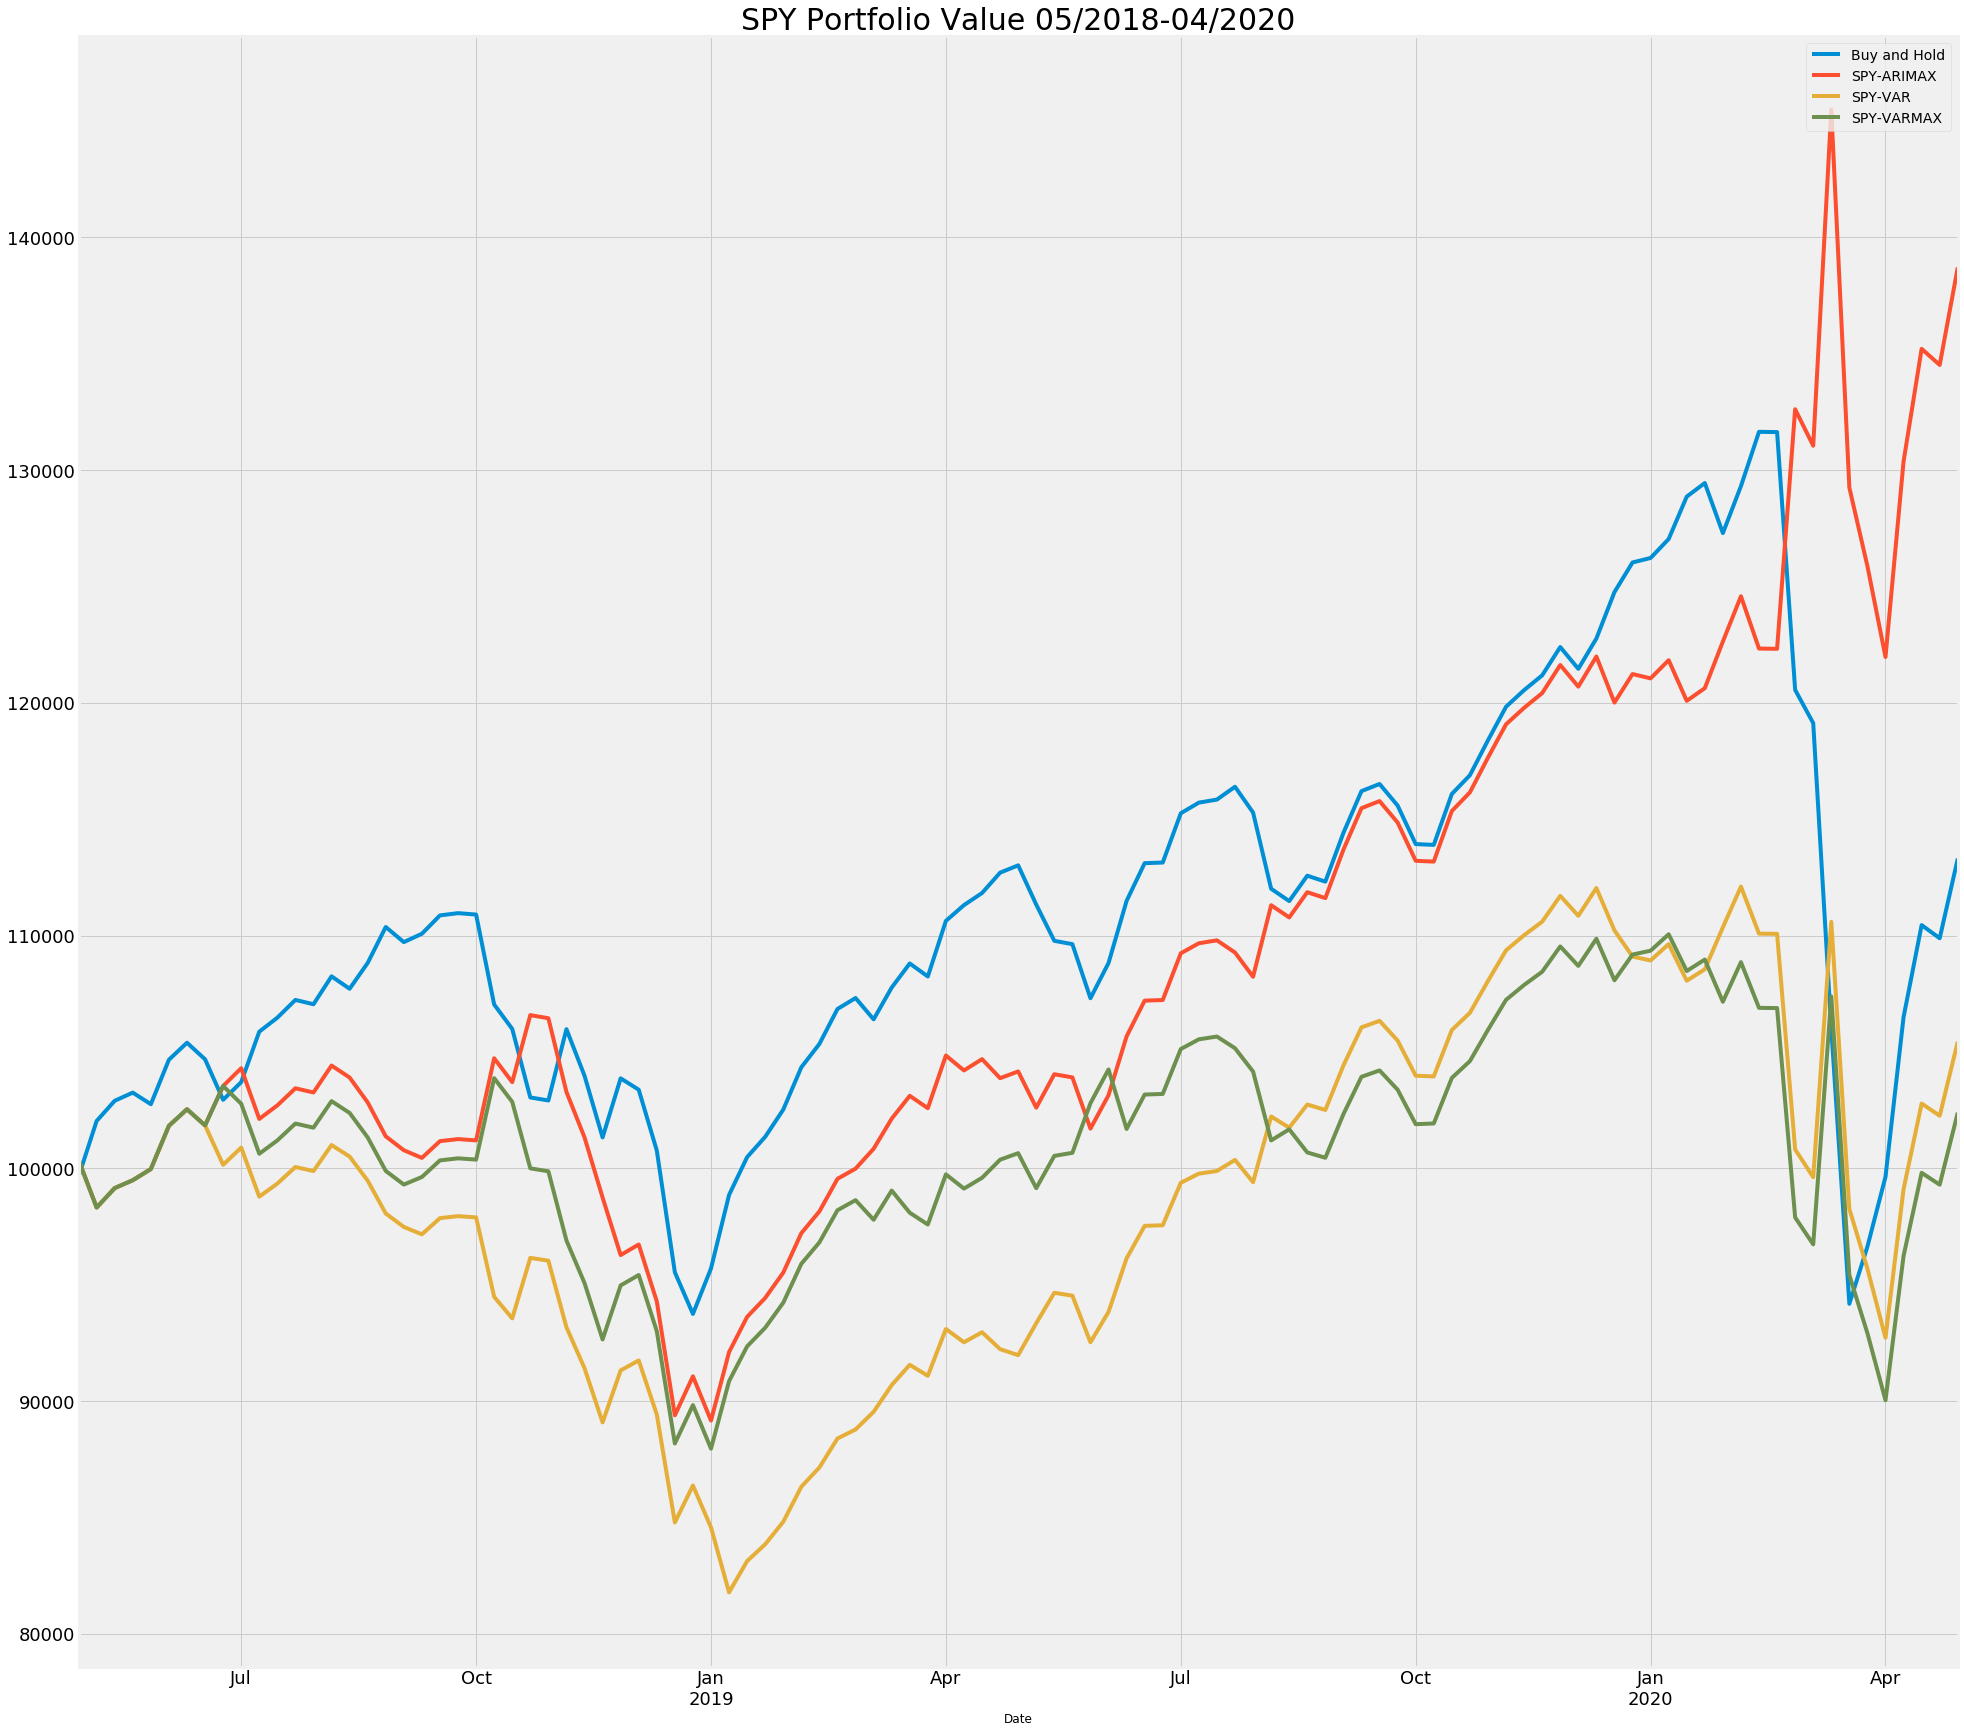

In [142]:

        
spy_equity_df.plot(figsize = (30,30), subplots=False, fontsize = 18)
plt.legend(fontsize=14, loc=1) 
plt.title("SPY Portfolio Value 05/2018-04/2020", fontsize=30);

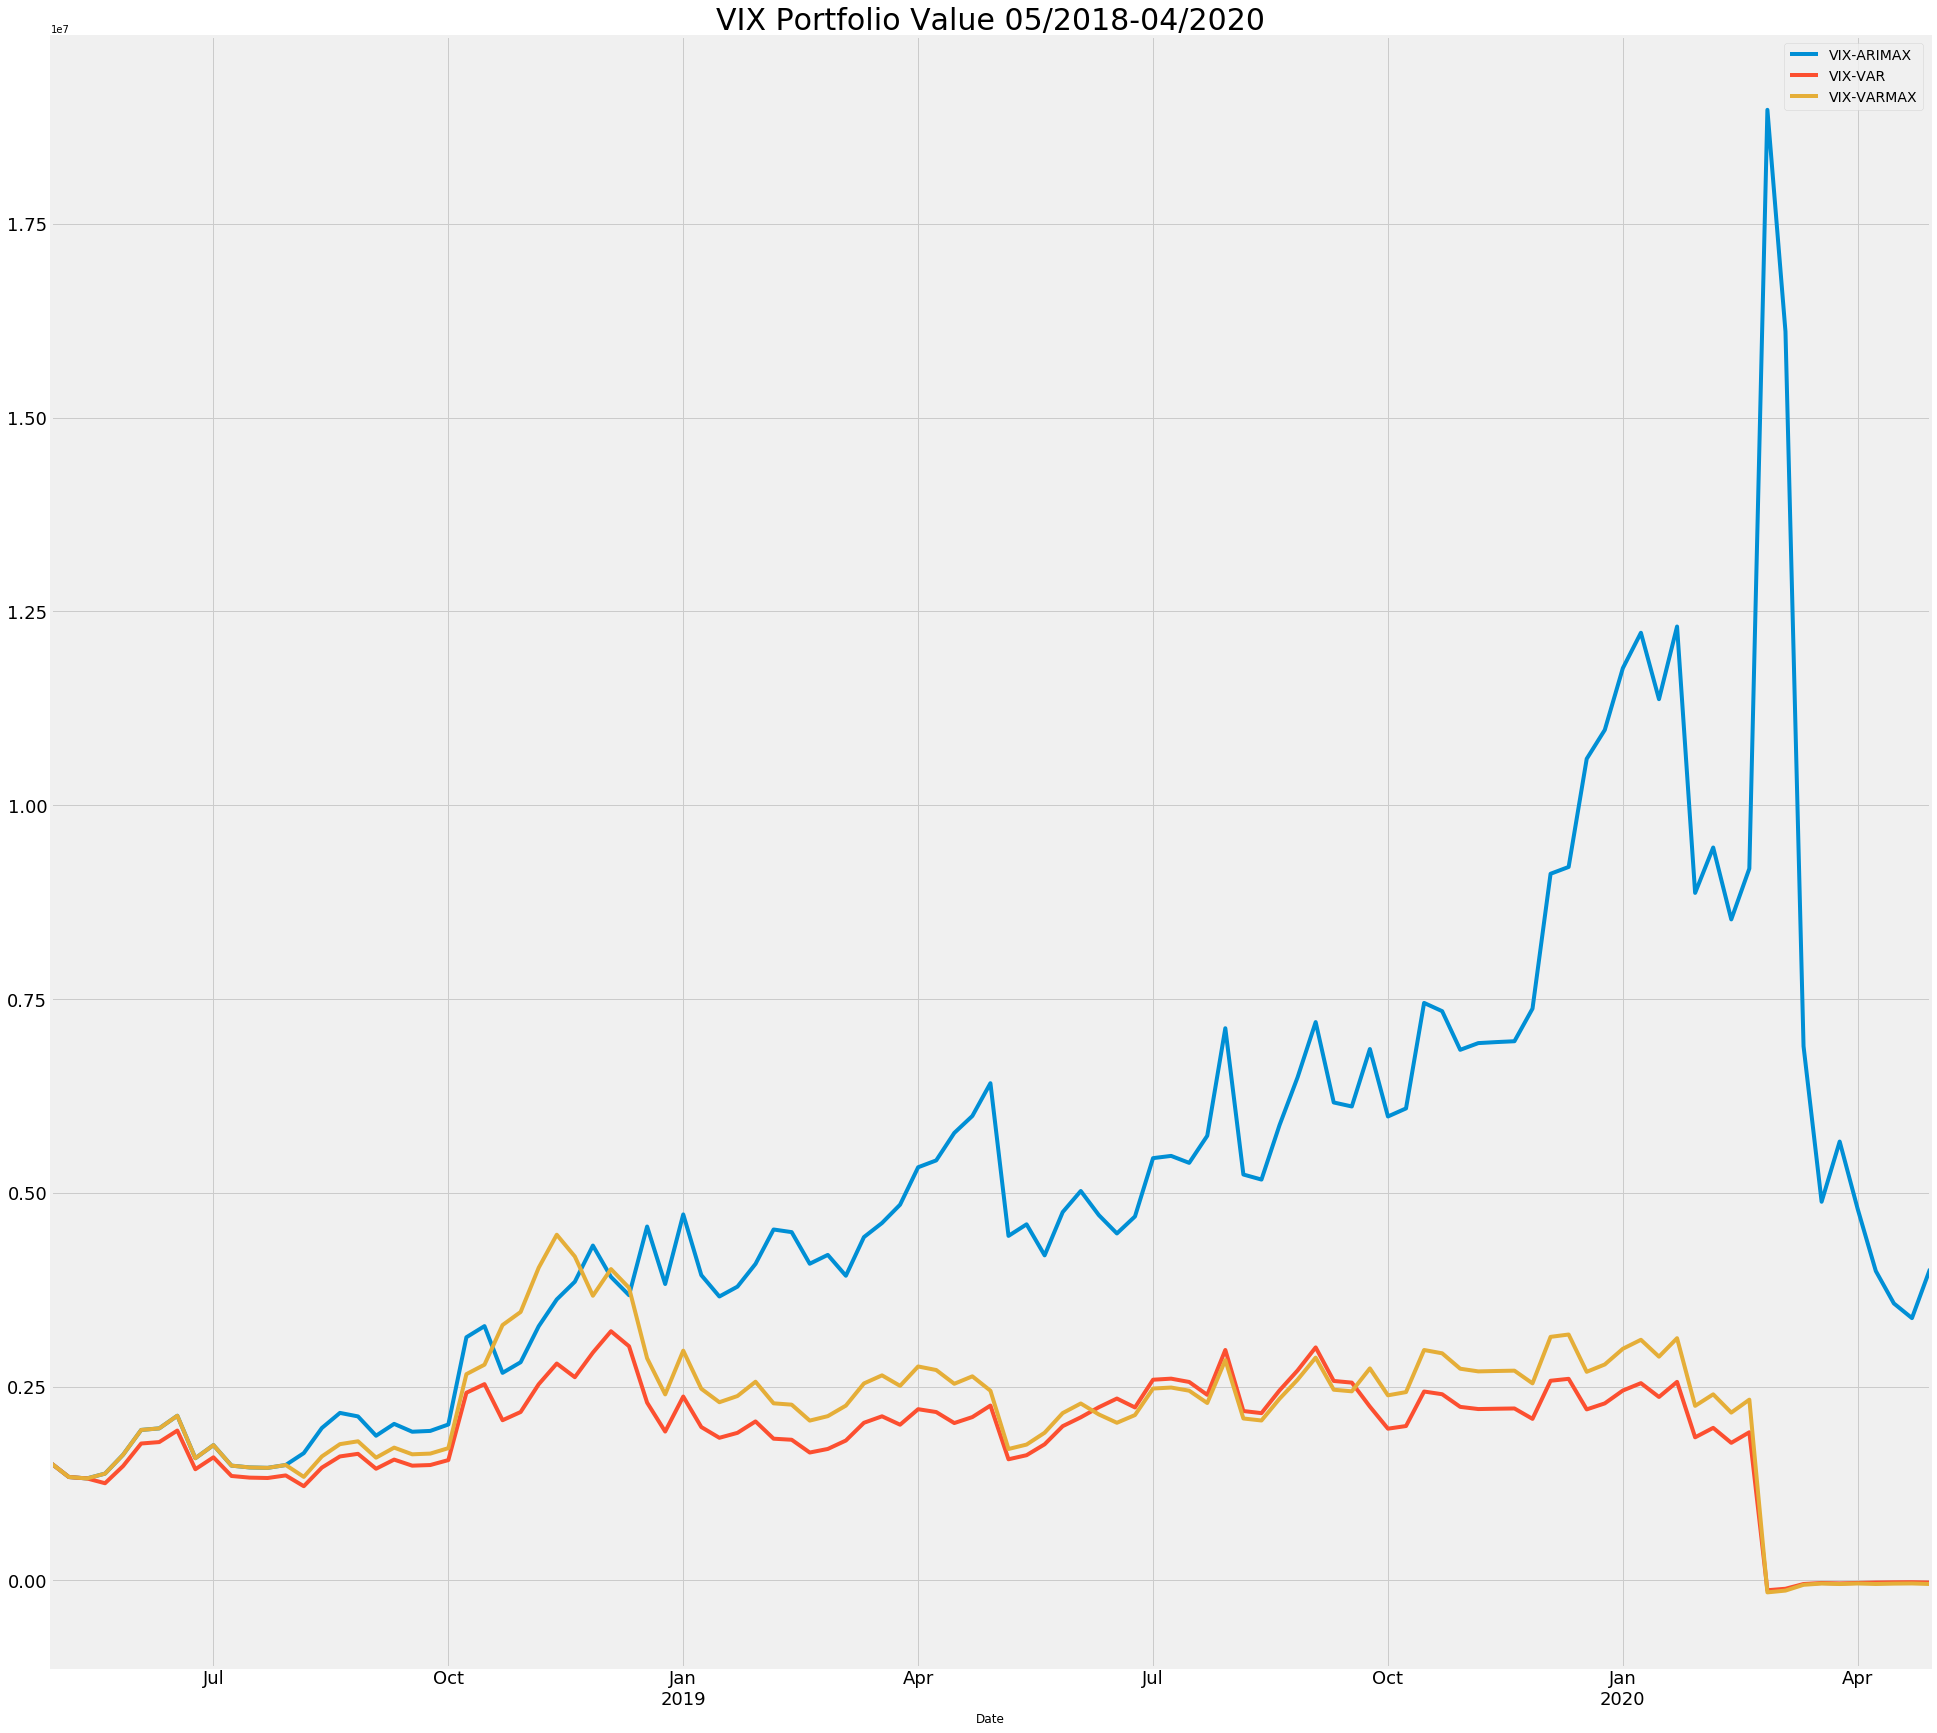

In [143]:
vix_equity_df.plot(figsize = (30,30), subplots=False, fontsize = 18)
plt.legend(fontsize=14, loc=1) 
plt.title("VIX Portfolio Value 05/2018-04/2020", fontsize=30);